## 회귀분석

In [1]:
import pandas as pd

In [2]:
anal_df = pd.read_csv("C:/data/now_used/1015_data3.csv")
anal_df

,건축물대장코드,구시군,읍면동,번,지,입주일,상가유형,지하총층,지상총층,연면적m2,...,주변세대수점수,주변평당가점수,상권코드명,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,공시지가,행정동생활인구
0,11110-10014,종로구,동숭동,1,114,1982-12-24,근린상가,1,5,1563.66,...,1.176,10.477,이화장길,1276469803,92138,926358383,350111420,131091.221409,22840000,38293.0
1,11110-100180009,종로구,동숭동,1,67,2008-07-03,기타상가,4,5,8585.08,...,1.207,10.754,이화장길,1276469803,92138,926358383,350111420,66131.584897,16310000,38293.0
2,11110-100184402,종로구,관훈동,186,0,2008-12-29,근린상가,0,3,172.11,...,0.363,19.104,계동길,725431028,41102,530637184,194793844,101021.253105,24600000,86083.0
3,11110-100190514,종로구,누하동,245,6,2011-09-28,근린상가,0,4,233.03,...,1.979,16.353,자하문로7길,1266093633,59989,952608422,313485211,67634.444078,7727000,40687.0
4,11110-100190842,종로구,효제동,19,3,2011-10-14,근린상가,0,5,253.80,...,0.810,10.063,율곡로16길,701283928,59235,586470792,114813136,112721.417069,4878000,30695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,11740-9659,강동구,고덕동,645,4,1988-09-16,근린상가,1,4,493.71,...,18.968,40.630,고덕로61길,237774734,14458,184722166,53052568,157349.896480,5684000,50099.0
9258,11740-9676,강동구,명일동,312,42,1980-06-27,근린상가,1,3,988.04,...,12.853,39.510,상암로51길,1138515459,61110,811089104,327426355,37556.499110,12580000,59355.0
9259,11740-9698,강동구,명일동,326,11,1981-10-05,근린상가,1,2,741.99,...,10.374,109.826,상암로51길,1138515459,61110,811089104,327426355,37556.499110,6444000,59355.0
9260,11740-9843,강동구,둔촌동,609,3,1993-12-06,근린상가,1,4,659.00,...,7.339,47.818,명일로13길,731403749,43065,546770943,184632806,39411.064842,6762000,55551.0


In [3]:
# 더미변수 추가
from pandas import get_dummies

type_dummies = pd.get_dummies(anal_df['상가유형'], prefix = 'type')

anal_df = pd.concat([anal_df, type_dummies], axis = 1)

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['주차대수']]

anal_df['주차가능여부'] = lst

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['승강기수']]

anal_df['승강기여부'] = lst

In [4]:
anal_df.columns

Index(['건축물대장코드', '구시군', '읍면동', '번', '지', '입주일', '상가유형', '지하총층', '지상총층',
       '연면적m2', '주차대수', '승강기수', '경도', '위도', 'usage_area', 'cont_area', 'RENT',
       'rent_ua', 'rent_ca', 'floor', '전철역명', '지하철거리m', '승객수점수', '건물별전기사용량',
       '본번별평균사용량', '횡단보도거리m', '건물연차', '가까운아파트', '가까운아파트총세대수', '가까운아파트평균평당가',
       '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수',
       '평균주중매출금액', '평균주말매출금액', '편의점임대료', '공시지가', '행정동생활인구', 'type_근린상가',
       'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부'],
      dtype='object')

In [5]:
print(len(anal_df), len(anal_df['건축물대장코드'].unique()))

9262 9262


In [6]:
anal_df = anal_df[['건축물대장코드', '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료','type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부','행정동생활인구']]

In [7]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 행정동생활인구', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     179.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:12:48   Log-Likelihood:                -22530.
No. Observations:                9262   AIC:                         4.512e+04
Df Residuals:                    9231   BIC:                         4.534e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0797      0.247      8.413      0.000       1.595       2.564
usage_area     -0.0005   4.83e-05     -9.809      0.000      -0.001      -0.000
cont_area   -2.339e-06   4.48e-06     -0.522      0.601   -1.11e-05    6.44e-06
지하총층           -0.1156      0.049     -2.374      0.018      -0.211      -0.020
지상총층           -0.0457      0.019     -2.394      0.017      -0.083      -0.008
연면적m2       -1.012e-05   1.89e-05     -0.535      0.593   -4.72e-05     2.7e-05
주차대수           -0.0007      0.002     -0.480      0.631      -0.004       0.002
승강기수            0.1491      0.065      2.277      0.023       0.021       0.278
지하철거리m         -0.0294      0.011     -2.792      0.005      -0.050      -0.009
승객수점수         4.14e-06   4.97e-07      8.329      0.000    3.17e-06    5.11e-06
횡단보도거리m        -0.0020      0.001     -2.821      0.005      -0.003      -0.001
건물별전기사용량     4.032e-06   1.13e-06      3.570      0.000    1.82e-06    6.25e-06
본번별평균사용량      2.85e-06   7.91e-07      3.602      0.000     1.3e-06     4.4e-06
건물연차           -0.0105      0.003     -3.214      0.001      -0.017      -0.004
공시지가         3.193e-07   6.57e-09     48.581      0.000    3.06e-07    3.32e-07
가까운아파트총세대수      0.0001   7.19e-05      1.798      0.072   -1.16e-05       0.000
가까운아파트평균평당가    -0.0001   3.28e-05     -3.959      0.000      -0.000   -6.57e-05
아파트거리          -0.0002      0.000     -0.898      0.369      -0.001       0.000
주변세대수점수         0.0315      0.010      3.199      0.001       0.012       0.051
주변평당가점수        -0.0025      0.001     -2.167      0.030      -0.005      -0.000
평균월매출금액      1.704e-10   2.88e-11      5.915      0.000    1.14e-10    2.27e-10
평균월매출건수     -5.249e-06   1.49e-06     -3.516      0.000   -8.18e-06   -2.32e-06
평균주중매출금액     5.938e-11    4.4e-11      1.350      0.177   -2.68e-11    1.46e-10
평균주말매출금액      1.53e-09   2.34e-10      6.530      0.000    1.07e-09    1.99e-09
편의점임대료       3.304e-06   5.56e-07      5.939      0.000    2.21e-06    4.39e-06
type_근린상가       0.6976      0.176      3.973      0.000       0.353       1.042
type_기타상가      -0.1561      0.177     -0.880      0.379      -0.504       0.192
type_단지내상가      2.1161      0.509      4.154      0.000       1.117       3.115
type_복합상가      -0.5780      0.346     -1.669      0.095      -1.257       0.101
주차가능여부         -0.2133      0.070     -3.039      0.002      -0.351      -0.076
승강기여부           0.3163      0.113      2.799      0.005       0.095       0.538
행정동생활인구     -4.101e-06   1.07e-06     -3.834      0.000    -6.2e-06      -2e-06
==============================================================================
Omnibus:                     7661.239   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           501478.679
Skew:                           3.543   Prob(J

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x26fd7bed850>,
 'caps': [<matplotlib.lines.Line2D at 0x26fd7bedf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x26fd7bed4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x26fd7bff610>],
 'fliers': [<matplotlib.lines.Line2D at 0x26fd7bff910>],
 'means': []}

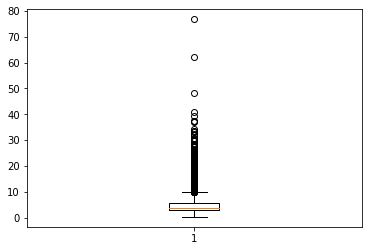

In [9]:
# rent_ua 이상치 파악
plt.boxplot(anal_df['rent_ua'])

## rent_ua 컬럼 이상치 제거

In [10]:
# rent_ua 이상치 제거
anal_df2 = anal_df.copy()

q1 = anal_df2['rent_ua'].quantile(0.25)
q3 = anal_df2['rent_ua'].quantile(0.75)
iqt = 1.5 * (q3-q1)

In [11]:
anal_df2.columns

Index(['건축물대장코드', '지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area',
       'cont_area', 'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량',
       '횡단보도거리m', '건물연차', '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리',
       '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수', '평균주중매출금액',
       '평균주말매출금액', '편의점임대료', 'type_근린상가', 'type_기타상가', 'type_단지내상가',
       'type_복합상가', '주차가능여부', '승강기여부', '행정동생활인구'],
      dtype='object')

In [12]:
z = anal_df2[[ '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', 'type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부','행정동생활인구']]

In [13]:
z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
z

<ipython-input-13-5b6fb51fab7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
C:\python\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
0,1,5,1563.66,0,1,15.50,15.50,NaN,1.082077,71533.898,...,926358383,350111420,131091.221409,1,0,0,0,0,1,38293.0
1,4,5,8585.08,7,4,103.00,143.92,NaN,1.373136,117064.164,...,926358383,350111420,66131.584897,0,1,0,0,1,1,38293.0
2,0,3,172.11,0,1,185.00,200.00,NaN,2.508637,46623.003,...,530637184,194793844,101021.253105,1,0,0,0,0,1,86083.0
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,952608422,313485211,67634.444078,1,0,0,0,1,0,40687.0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,586470792,114813136,112721.417069,1,0,0,0,0,0,30695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,184722166,53052568,157349.896480,1,0,0,0,1,0,50099.0
9258,1,3,988.04,0,0,41.19,41.19,NaN,0.729846,33569.452,...,811089104,327426355,37556.499110,1,0,0,0,0,0,59355.0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,811089104,327426355,37556.499110,1,0,0,0,1,0,59355.0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,546770943,184632806,39411.064842,1,0,0,0,1,0,55551.0


In [14]:
z.isnull().sum()

지하총층             0
지상총층             0
연면적m2            0
주차대수             0
승강기수             0
usage_area       0
cont_area        0
rent_ua        542
지하철거리m           0
승객수점수            0
건물별전기사용량         0
본번별평균사용량         0
횡단보도거리m          0
건물연차             0
공시지가             0
가까운아파트총세대수       0
가까운아파트평균평당가      0
아파트거리            0
주변세대수점수          0
주변평당가점수          0
평균월매출금액          0
평균월매출건수          0
평균주중매출금액         0
평균주말매출금액         0
편의점임대료           0
type_근린상가        0
type_기타상가        0
type_단지내상가       0
type_복합상가        0
주차가능여부           0
승강기여부            0
행정동생활인구          0
dtype: int64

In [15]:
z = z.dropna(axis = 0, how = 'any')
z.isnull().sum()

지하총층           0
지상총층           0
연면적m2          0
주차대수           0
승강기수           0
usage_area     0
cont_area      0
rent_ua        0
지하철거리m         0
승객수점수          0
건물별전기사용량       0
본번별평균사용량       0
횡단보도거리m        0
건물연차           0
공시지가           0
가까운아파트총세대수     0
가까운아파트평균평당가    0
아파트거리          0
주변세대수점수        0
주변평당가점수        0
평균월매출금액        0
평균월매출건수        0
평균주중매출금액       0
평균주말매출금액       0
편의점임대료         0
type_근린상가      0
type_기타상가      0
type_단지내상가     0
type_복합상가      0
주차가능여부         0
승강기여부          0
행정동생활인구        0
dtype: int64

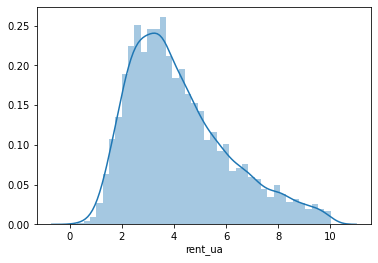

In [16]:
sns.distplot(z.iloc[:,7])
plt.show()

In [17]:
import scipy as sp
import scipy.stats as stats

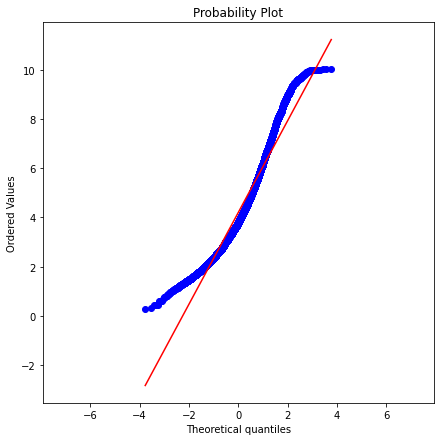

In [18]:
x = z.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

In [19]:
# 이상값 다시 제거

q1 = z["rent_ua"].quantile(0.25)
q3 = z["rent_ua"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z1 = z.copy()
z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None
z1

<ipython-input-19-02376eca61ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,952608422,313485211,67634.444078,1,0,0,0,1,0,40687.0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,586470792,114813136,112721.417069,1,0,0,0,0,0,30695.0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,926358383,350111420,85005.100306,0,1,0,0,1,1,38293.0
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,530637184,194793844,112503.643253,1,0,0,0,1,0,12726.0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,810808853,321931432,95483.870968,1,0,0,0,0,0,55931.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,598585337,246834320,38862.980235,1,0,0,0,1,0,105763.0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,184722166,53052568,157349.896480,1,0,0,0,1,0,50099.0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,811089104,327426355,37556.499110,1,0,0,0,1,0,59355.0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,546770943,184632806,39411.064842,1,0,0,0,1,0,55551.0


In [20]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 3 to 9261
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8720 non-null   int64  
 1   지상총층         8720 non-null   int64  
 2   연면적m2        8720 non-null   float64
 3   주차대수         8720 non-null   int64  
 4   승강기수         8720 non-null   int64  
 5   usage_area   8720 non-null   float64
 6   cont_area    8720 non-null   float64
 7   rent_ua      8563 non-null   float64
 8   지하철거리m       8720 non-null   float64
 9   승객수점수        8720 non-null   float64
 10  건물별전기사용량     8720 non-null   int64  
 11  본번별평균사용량     8720 non-null   float64
 12  횡단보도거리m      8720 non-null   float64
 13  건물연차         8720 non-null   int64  
 14  공시지가         8720 non-null   int64  
 15  가까운아파트총세대수   8720 non-null   int64  
 16  가까운아파트평균평당가  8720 non-null   float64
 17  아파트거리        8720 non-null   float64
 18  주변세대수점수      8720 non-null   float64
 19  주변평당가점

In [21]:
z1 = z1.dropna(axis = 0, how = 'any')
z1

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,952608422,313485211,67634.444078,1,0,0,0,1,0,40687.0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,586470792,114813136,112721.417069,1,0,0,0,0,0,30695.0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,926358383,350111420,85005.100306,0,1,0,0,1,1,38293.0
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,530637184,194793844,112503.643253,1,0,0,0,1,0,12726.0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,810808853,321931432,95483.870968,1,0,0,0,0,0,55931.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,598585337,246834320,38862.980235,1,0,0,0,1,0,105763.0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,184722166,53052568,157349.896480,1,0,0,0,1,0,50099.0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,811089104,327426355,37556.499110,1,0,0,0,1,0,59355.0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,546770943,184632806,39411.064842,1,0,0,0,1,0,55551.0


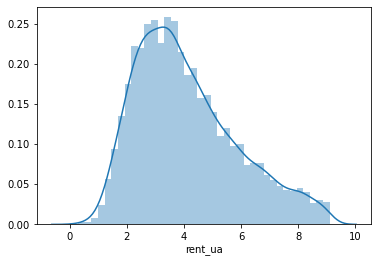

In [22]:
sns.distplot(z1.iloc[:,7])
plt.show()

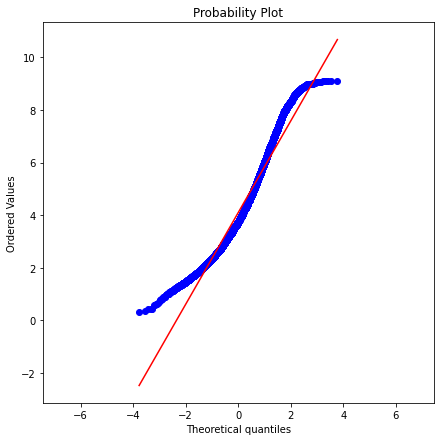

In [23]:
x = z1.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

## 상관계수 히트맵 그려보기

In [24]:
# 상관계수 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# 스피어만 상관계수

corr_ua_s = z1.corr(method = 'spearman')
corr_ua_s

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
지하총층,1.000000,0.474845,0.575411,0.310545,0.372233,0.177908,0.216480,0.115560,-0.006472,0.152229,...,0.083255,0.061713,0.132663,-0.412911,0.338781,0.079730,0.232124,0.213229,0.338607,0.149450
지상총층,0.474845,1.000000,0.725013,0.558848,0.620730,0.255147,0.288443,0.155214,-0.020228,0.173070,...,0.141506,0.108190,0.151624,-0.405357,0.348513,0.067964,0.191363,0.485987,0.611718,0.167042
연면적m2,0.575411,0.725013,1.000000,0.571064,0.549044,0.306538,0.350283,0.177112,0.005932,0.147092,...,0.114244,0.077690,0.140220,-0.446387,0.392991,0.066816,0.190403,0.415303,0.534493,0.167837
주차대수,0.310545,0.558848,0.571064,1.000000,0.453533,0.208470,0.236113,0.086560,0.041764,0.063499,...,0.093308,0.084919,0.094971,-0.244339,0.179982,0.056156,0.185896,0.888412,0.438523,0.160498
승강기수,0.372233,0.620730,0.549044,0.453533,1.000000,0.244907,0.275890,0.183578,-0.043667,0.174911,...,0.123879,0.092000,0.149497,-0.402780,0.324594,0.083448,0.239207,0.341575,0.993957,0.138937
usage_area,0.177908,0.255147,0.306538,0.208470,0.244907,1.000000,0.970796,0.042477,-0.057932,0.274192,...,0.191173,0.189792,0.145685,-0.155979,0.148483,0.007125,0.044253,0.173963,0.248884,0.190157
cont_area,0.216480,0.288443,0.350283,0.236113,0.275890,0.970796,1.000000,0.082693,-0.058046,0.286391,...,0.196044,0.190876,0.161154,-0.197023,0.180403,0.009849,0.073674,0.190946,0.275399,0.203771
rent_ua,0.115560,0.155214,0.177112,0.086560,0.183578,0.042477,0.082693,1.000000,-0.228621,0.349202,...,0.285700,0.293223,0.299452,-0.143748,0.118957,0.040144,0.073691,0.045416,0.175310,0.193973
지하철거리m,-0.006472,-0.020228,0.005932,0.041764,-0.043667,-0.057932,-0.058046,-0.228621,1.000000,-0.471876,...,-0.241281,-0.215861,-0.259660,0.064017,-0.063272,-0.009261,-0.009938,0.059545,-0.040728,-0.064476
승객수점수,0.152229,0.173070,0.147092,0.063499,0.174911,0.274192,0.286391,0.349202,-0.471876,1.000000,...,0.446685,0.397073,0.343167,-0.174308,0.148046,0.021762,0.089628,0.032128,0.169657,0.232939


In [25]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


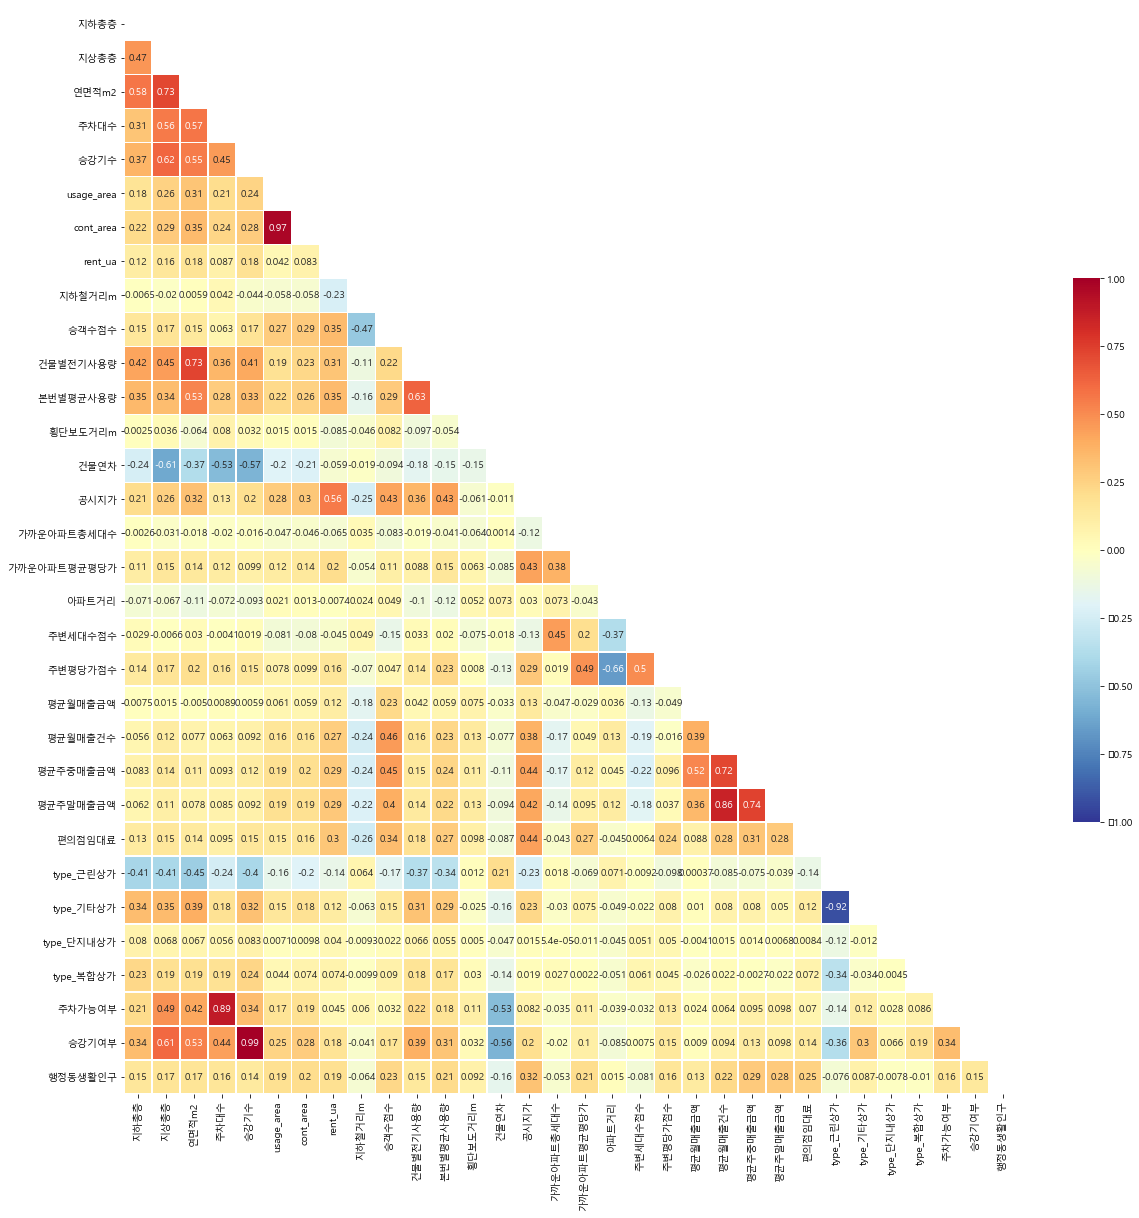

In [26]:
# 스피어만 상관계수 히트맵

mask = np.zeros_like(corr_ua_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(20,20) )

sns.heatmap(corr_ua_s,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [27]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 행정동생활인구', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     179.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:12:51   Log-Likelihood:                -22530.
No. Observations:                9262   AIC:                         4.512e+04
Df Residuals:                    9231   BIC:                         4.534e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0797      0.247      8.413      0.000       1.595       2.564
usage_area     -0.0005   4.83e-05     -9.809      0.000      -0.001      -0.000
cont_area   -2.339e-06   4.48e-06     -0.522      0.601   -1.11e-05    6.44e-06
지하총층           -0.1156      0.049     -2.374      0.018      -0.211      -0.020
지상총층           -0.0457      0.019     -2.394      0.017      -0.083      -0.008
연면적m2       -1.012e-05   1.89e-05     -0.535      0.593   -4.72e-05     2.7e-05
주차대수           -0.0007      0.002     -0.480      0.631      -0.004       0.002
승강기수            0.1491      0.065      2.277      0.023       0.021       0.278
지하철거리m         -0.0294      0.011     -2.792      0.005      -0.050      -0.009
승객수점수         4.14e-06   4.97e-07      8.329      0.000    3.17e-06    5.11e-06
횡단보도거리m        -0.0020      0.001     -2.821      0.005      -0.003      -0.001
건물별전기사용량     4.032e-06   1.13e-06      3.570      0.000    1.82e-06    6.25e-06
본번별평균사용량      2.85e-06   7.91e-07      3.602      0.000     1.3e-06     4.4e-06
건물연차           -0.0105      0.003     -3.214      0.001      -0.017      -0.004
공시지가         3.193e-07   6.57e-09     48.581      0.000    3.06e-07    3.32e-07
가까운아파트총세대수      0.0001   7.19e-05      1.798      0.072   -1.16e-05       0.000
가까운아파트평균평당가    -0.0001   3.28e-05     -3.959      0.000      -0.000   -6.57e-05
아파트거리          -0.0002      0.000     -0.898      0.369      -0.001       0.000
주변세대수점수         0.0315      0.010      3.199      0.001       0.012       0.051
주변평당가점수        -0.0025      0.001     -2.167      0.030      -0.005      -0.000
평균월매출금액      1.704e-10   2.88e-11      5.915      0.000    1.14e-10    2.27e-10
평균월매출건수     -5.249e-06   1.49e-06     -3.516      0.000   -8.18e-06   -2.32e-06
평균주중매출금액     5.938e-11    4.4e-11      1.350      0.177   -2.68e-11    1.46e-10
평균주말매출금액      1.53e-09   2.34e-10      6.530      0.000    1.07e-09    1.99e-09
편의점임대료       3.304e-06   5.56e-07      5.939      0.000    2.21e-06    4.39e-06
type_근린상가       0.6976      0.176      3.973      0.000       0.353       1.042
type_기타상가      -0.1561      0.177     -0.880      0.379      -0.504       0.192
type_단지내상가      2.1161      0.509      4.154      0.000       1.117       3.115
type_복합상가      -0.5780      0.346     -1.669      0.095      -1.257       0.101
주차가능여부         -0.2133      0.070     -3.039      0.002      -0.351      -0.076
승강기여부           0.3163      0.113      2.799      0.005       0.095       0.538
행정동생활인구     -4.101e-06   1.07e-06     -3.834      0.000    -6.2e-06      -2e-06
==============================================================================
Omnibus:                     7661.239   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           501478.679
Skew:                           3.543   Prob(J

## 주요컬럼 이상치 제거
상관계수가 0.3 이상인 변수의 이상치를 제거한다.
* 승객수점수, 건물별전기사용량, 본번별평균사용량, 공시지가, 편의점임대료

In [28]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8563 entries, 3 to 9261
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8563 non-null   int64  
 1   지상총층         8563 non-null   int64  
 2   연면적m2        8563 non-null   float64
 3   주차대수         8563 non-null   int64  
 4   승강기수         8563 non-null   int64  
 5   usage_area   8563 non-null   float64
 6   cont_area    8563 non-null   float64
 7   rent_ua      8563 non-null   float64
 8   지하철거리m       8563 non-null   float64
 9   승객수점수        8563 non-null   float64
 10  건물별전기사용량     8563 non-null   int64  
 11  본번별평균사용량     8563 non-null   float64
 12  횡단보도거리m      8563 non-null   float64
 13  건물연차         8563 non-null   int64  
 14  공시지가         8563 non-null   int64  
 15  가까운아파트총세대수   8563 non-null   int64  
 16  가까운아파트평균평당가  8563 non-null   float64
 17  아파트거리        8563 non-null   float64
 18  주변세대수점수      8563 non-null   float64
 19  주변평당가점

In [29]:
# 승객수점수 이상값 제거

q1 = z1["승객수점수"].quantile(0.25)
q3 = z1["승객수점수"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z2 = z1.copy()
z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None

z2 = z2.dropna(axis = 0, how= 'any')
z2

<ipython-input-29-1eb64b94a9ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,952608422,313485211,67634.444078,1,0,0,0,1,0,40687.0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,586470792,114813136,112721.417069,1,0,0,0,0,0,30695.0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,926358383,350111420,85005.100306,0,1,0,0,1,1,38293.0
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,530637184,194793844,112503.643253,1,0,0,0,1,0,12726.0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,810808853,321931432,95483.870968,1,0,0,0,0,0,55931.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,598585337,246834320,38862.980235,1,0,0,0,1,0,105763.0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,184722166,53052568,157349.896480,1,0,0,0,1,0,50099.0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,811089104,327426355,37556.499110,1,0,0,0,1,0,59355.0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,546770943,184632806,39411.064842,1,0,0,0,1,0,55551.0


In [30]:
# 건물별전기사용량 이상값 제거

q1 = z2["건물별전기사용량"].quantile(0.25)
q3 = z2["건물별전기사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z5 = z2.copy()
z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None

z5 = z5.dropna(axis = 0, how= 'any')
z5

<ipython-input-30-17f55af414cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,952608422,313485211,67634.444078,1,0,0,0,1,0,40687.0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,586470792,114813136,112721.417069,1,0,0,0,0,0,30695.0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,810808853,321931432,95483.870968,1,0,0,0,0,0,55931.0
10,1,3,582.39,5,0,140.00,140.00,2.714286,3.709688,59466.010,...,530637184,194793844,112503.643253,1,0,0,0,1,0,12726.0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,238345356,83405321,42156.361778,1,0,0,0,0,0,39884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,603684567,240763402,51101.043093,1,0,0,0,1,0,51049.0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,856807483,332392728,37556.499110,1,0,0,0,0,0,30279.0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,184722166,53052568,157349.896480,1,0,0,0,1,0,50099.0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,811089104,327426355,37556.499110,1,0,0,0,1,0,59355.0


In [31]:
# 본번별평균사용량 이상값 제거

q1 = z5["본번별평균사용량"].quantile(0.25)
q3 = z5["본번별평균사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z6 = z5.copy()
z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None

z6 = z6.dropna(axis = 0, how= 'any')
z6

<ipython-input-31-f294d06d6038>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,952608422,313485211,67634.444078,1,0,0,0,1,0,40687.0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,586470792,114813136,112721.417069,1,0,0,0,0,0,30695.0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,810808853,321931432,95483.870968,1,0,0,0,0,0,55931.0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,238345356,83405321,42156.361778,1,0,0,0,0,0,39884.0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,926358383,350111420,85005.100306,1,0,0,0,0,0,38293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,603684567,240763402,51101.043093,1,0,0,0,1,0,51049.0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,856807483,332392728,37556.499110,1,0,0,0,0,0,30279.0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,184722166,53052568,157349.896480,1,0,0,0,1,0,50099.0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,811089104,327426355,37556.499110,1,0,0,0,1,0,59355.0


In [32]:
# 공시지가 이상값 제거

q1 = z6["공시지가"].quantile(0.25)
q3 = z6["공시지가"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z7 = z6.copy()
z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None

z7 = z7.dropna(axis = 0, how= 'any')
z7

<ipython-input-32-9075cfbc185d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,952608422,313485211,67634.444078,1,0,0,0,1,0,40687.0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,586470792,114813136,112721.417069,1,0,0,0,0,0,30695.0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,810808853,321931432,95483.870968,1,0,0,0,0,0,55931.0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,238345356,83405321,42156.361778,1,0,0,0,0,0,39884.0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,926358383,350111420,85005.100306,1,0,0,0,0,0,38293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,603684567,240763402,51101.043093,1,0,0,0,1,0,51049.0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,856807483,332392728,37556.499110,1,0,0,0,0,0,30279.0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,184722166,53052568,157349.896480,1,0,0,0,1,0,50099.0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,811089104,327426355,37556.499110,1,0,0,0,1,0,59355.0


In [33]:
# 편의점임대료 이상값 제거

q1 = z7["편의점임대료"].quantile(0.25)
q3 = z7["편의점임대료"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z8 = z7.copy()
z8["편의점임대료"][(z8["편의점임대료"] > (q3 + iqt)) | (z8["편의점임대료"] < (q1 - iqt))] = None

z8 = z8.dropna(axis = 0, how= 'any')
z8

<ipython-input-33-fce20a1b0570>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z8["편의점임대료"][(z8["편의점임대료"] > (q3 + iqt)) | (z8["편의점임대료"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,행정동생활인구
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,952608422,313485211,67634.444078,1,0,0,0,1,0,40687.0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,586470792,114813136,112721.417069,1,0,0,0,0,0,30695.0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,810808853,321931432,95483.870968,1,0,0,0,0,0,55931.0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,238345356,83405321,42156.361778,1,0,0,0,0,0,39884.0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,926358383,350111420,85005.100306,1,0,0,0,0,0,38293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,1,7,2256.70,16,0,1622.88,2078.64,4.929508,4.212383,23925.620,...,917748606,337868981,35753.147831,1,0,0,0,1,0,105763.0
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,603684567,240763402,51101.043093,1,0,0,0,1,0,51049.0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,856807483,332392728,37556.499110,1,0,0,0,0,0,30279.0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,811089104,327426355,37556.499110,1,0,0,0,1,0,59355.0


## 회귀분석

In [34]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 행정동생활인구', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     94.48
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:12:51   Log-Likelihood:                -10381.
No. Observations:                6108   AIC:                         2.082e+04
Df Residuals:                    6078   BIC:                         2.102e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1687      0.557      2.099      0.036       0.077       2.260
usage_area     -0.0004   6.09e-05     -6.971      0.000      -0.001      -0.000
cont_area    9.669e-05   4.56e-05      2.121      0.034    7.31e-06       0.000
지하총층           -0.2023      0.045     -4.545      0.000      -0.289      -0.115
지상총층           -0.0311      0.018     -1.703      0.089      -0.067       0.005
연면적m2          -0.0003   5.08e-05     -5.580      0.000      -0.000      -0.000
주차대수            0.0327      0.006      5.491      0.000       0.021       0.044
승강기수            0.5108      0.213      2.400      0.016       0.094       0.928
지하철거리m         -0.0050      0.006     -0.847      0.397      -0.017       0.007
승객수점수        5.112e-06    6.5e-07      7.869      0.000    3.84e-06    6.39e-06
횡단보도거리m        -0.0015      0.000     -3.880      0.000      -0.002      -0.001
건물별전기사용량     3.734e-05   4.99e-06      7.487      0.000    2.76e-05    4.71e-05
본번별평균사용량     2.017e-05   5.33e-06      3.786      0.000    9.73e-06    3.06e-05
건물연차           -0.0093      0.002     -4.613      0.000      -0.013      -0.005
공시지가         2.936e-07   9.17e-09     32.007      0.000    2.76e-07    3.12e-07
가까운아파트총세대수   -9.39e-05   4.54e-05     -2.068      0.039      -0.000   -4.89e-06
가까운아파트평균평당가 -2.868e-05   2.36e-05     -1.213      0.225    -7.5e-05    1.76e-05
아파트거리           0.0001      0.000      1.090      0.276   -9.98e-05       0.000
주변세대수점수         0.0168      0.007      2.539      0.011       0.004       0.030
주변평당가점수      3.887e-05      0.001      0.033      0.974      -0.002       0.002
평균월매출금액      1.062e-10   2.06e-11      5.164      0.000    6.59e-11    1.47e-10
평균월매출건수     -1.501e-06   1.07e-06     -1.402      0.161    -3.6e-06    5.98e-07
평균주중매출금액    -1.905e-11   3.25e-11     -0.586      0.558   -8.27e-11    4.46e-11
평균주말매출금액     6.832e-10   1.62e-10      4.218      0.000    3.66e-10       1e-09
편의점임대료       1.299e-06   6.49e-07      2.002      0.045     2.7e-08    2.57e-06
type_근린상가       0.9783      0.547      1.790      0.074      -0.093       2.050
type_기타상가       0.8952      0.542      1.651      0.099      -0.168       1.958
type_단지내상가   1.531e-15   3.42e-15      0.447      0.655   -5.18e-15    8.24e-15
type_복합상가      -0.7047      1.627     -0.433      0.665      -3.894       2.485
주차가능여부         -0.2186      0.047     -4.638      0.000      -0.311      -0.126
승강기여부          -0.4533      0.222     -2.046      0.041      -0.888      -0.019
행정동생활인구     -1.642e-06   7.13e-07     -2.302      0.021   -3.04e-06   -2.44e-07
==============================================================================
Omnibus:                      605.102   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.229
Skew:                           0.746   Prob(J

## 다중공선성 파악
다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다. 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)

In [35]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 'cont_area',
 '지하총층',
 '지상총층',
 '연면적m2',
 '주차대수',
 '승강기수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '공시지가',
 '가까운아파트총세대수',
 '가까운아파트평균평당가',
 '아파트거리',
 '주변세대수점수',
 '주변평당가점수',
 '평균월매출금액',
 '평균월매출건수',
 '평균주중매출금액',
 '평균주말매출금액',
 '편의점임대료',
 'type_근린상가',
 'type_기타상가',
 'type_단지내상가',
 'type_복합상가',
 '주차가능여부',
 '승강기여부',
 '행정동생활인구']

In [37]:
pd.options.display.float_format = '{:.5f}'.format

In [38]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

C:\python\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\python\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,컬럼,VIF
0,usage_area,3.57266
1,cont_area,3.47051
2,지하총층,1.38986
3,지상총층,2.86192
4,연면적m2,28.86024
5,주차대수,24.55977
6,승강기수,31.73882
7,지하철거리m,1.24171
8,승객수점수,1.49524
9,횡단보도거리m,1.09841


C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


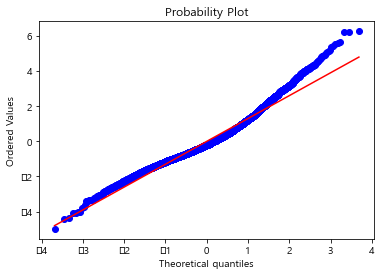

In [39]:
# 잔차의 정규성 확인

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 조금 다른 방법으로 회귀분석 수행

res2 = sm.ols(formula='rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 행정동생활인구', data = z8)

# 회귀분석 결과에서 잔차만 추출

resid = res2.fit().resid

# Q-Q Plot을 그려서 정규성 확인

from scipy.stats import probplot

plt.figure()
probplot(resid, plot=plt)
plt.show()

## 다중공선성 10 이상 변수 제외, p-value > 0.05 변수 제외

In [40]:
model3 = ols('rent_ua ~ usage_area + 지하총층 + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 주변세대수점수 + 평균월매출금액 + 평균주말매출금액 + 주차가능여부 + 행정동생활인구', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     188.4
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:12:52   Log-Likelihood:                -10419.
No. Observations:                6108   AIC:                         2.087e+04
Df Residuals:                    6093   BIC:                         2.097e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9255      0.102     18.932      0.000       1.726       2.125
usage_area    -0.0003   3.35e-05     -8.835      0.000      -0.000      -0.000
지하총층          -0.2947      0.039     -7.480      0.000      -0.372      -0.217
승객수점수       5.356e-06      6e-07      8.922      0.000    4.18e-06    6.53e-06
횡단보도거리m       -0.0014      0.000     -3.657      0.000      -0.002      -0.001
건물별전기사용량    2.283e-05   4.46e-06      5.119      0.000    1.41e-05    3.16e-05
본번별평균사용량    2.021e-05   5.31e-06      3.806      0.000     9.8e-06    3.06e-05
건물연차          -0.0067      0.002     -3.886      0.000      -0.010      -0.003
공시지가        2.864e-07   8.09e-09     35.409      0.000    2.71e-07    3.02e-07
가까운아파트총세대수 -9.205e-05   3.66e-05     -2.514      0.012      -0.000   -2.03e-05
주변세대수점수        0.0164      0.006      2.863      0.004       0.005       0.028
평균월매출금액     1.031e-10   1.95e-11      5.302      0.000     6.5e-11    1.41e-10
평균주말매출금액    5.931e-10   1.04e-10      5.677      0.000    3.88e-10    7.98e-10
주차가능여부        -0.1387      0.041     -3.402      0.001      -0.219      -0.059
행정동생활인구    -1.416e-06   7.11e-07     -1.993      0.046   -2.81e-06   -2.32e-08
==============================================================================
Omnibus:                      610.154   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              919.316
Skew:                           0.753   Prob(JB):                    2.36e-200
Kurtosis:                       4.159   Cond. No.                     7.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,1.06588
1,지하총층,1.07902
2,승객수점수,1.26397
3,횡단보도거리m,1.07213
4,건물별전기사용량,1.33992
5,본번별평균사용량,1.35717
6,건물연차,1.42868
7,공시지가,1.45183
8,가까운아파트총세대수,1.46632
9,주변세대수점수,1.47976


## 변수 4개 / 6개만 사용

In [44]:
model3 = ols('rent_ua ~ usage_area + 평균주말매출금액 + 공시지가 + 연면적m2', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     562.6
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:13:28   Log-Likelihood:                -10559.
No. Observations:                6108   AIC:                         2.113e+04
Df Residuals:                    6103   BIC:                         2.116e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6613      0.048     34.375      0.000       1.567       1.756
usage_area    -0.0003   3.37e-05     -7.717      0.000      -0.000      -0.000
평균주말매출금액    5.093e-10   9.63e-11      5.287      0.000     3.2e-10    6.98e-10
공시지가        3.135e-07   7.51e-09     41.752      0.000    2.99e-07    3.28e-07
연면적m2      -3.611e-06    9.8e-06     -0.369      0.712   -2.28e-05    1.56e-05
==============================================================================
Omnibus:                      651.649   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.039
Skew:                           0.800   Prob(JB):                    8.40e-212
Kurtosis:                       4.123   Cond. No.                     1.04e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,1.03689
1,평균주말매출금액,1.16778
2,공시지가,1.19734
3,연면적m2,1.01666


In [46]:
model3 = ols('rent_ua ~ usage_area + 본번별평균사용량 + 공시지가 + 연면적m2 + 승객수점수 + 평균주말매출금액', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     405.1
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:13:37   Log-Likelihood:                -10494.
No. Observations:                6108   AIC:                         2.100e+04
Df Residuals:                    6101   BIC:                         2.105e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5104      0.050     30.082      0.000       1.412       1.609
usage_area    -0.0003   3.36e-05     -9.155      0.000      -0.000      -0.000
본번별평균사용량    2.857e-05   4.89e-06      5.839      0.000     1.9e-05    3.82e-05
공시지가        2.838e-07    7.9e-09     35.925      0.000    2.68e-07    2.99e-07
연면적m2      -9.109e-06   9.71e-06     -0.938      0.348   -2.81e-05    9.92e-06
승객수점수        5.64e-06   5.91e-07      9.544      0.000    4.48e-06     6.8e-06
평균주말매출금액    3.041e-10   9.73e-11      3.127      0.002    1.13e-10    4.95e-10
==============================================================================
Omnibus:                      642.892   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              967.706
Skew:                           0.786   Prob(JB):                    7.33e-211
Kurtosis:                       4.153   Cond. No.                     1.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,1.05294
1,본번별평균사용량,1.12619
2,공시지가,1.35376
3,연면적m2,1.01967
4,승객수점수,1.19688
5,평균주말매출금액,1.21552
